# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

**Opdracht 1**

Voor de trendlijn is aangenomen dat alle toegevoerde energie in het water gaat zitten.
Ook wordt aangenomen dat de temperatuur de eerste 20 minuten zo laag is dat er geen verdamping is.


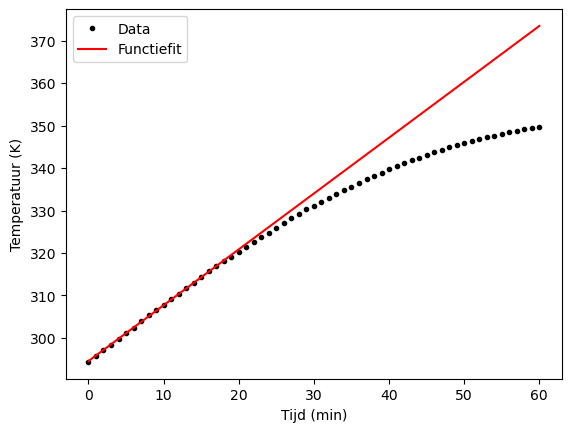

In [6]:
#OPDRACHT 1
print('Voor de trendlijn is aangenomen dat alle toegevoerde energie in het water gaat zitten.')
print('Ook wordt aangenomen dat de temperatuur de eerste 20 minuten zo laag is dat er geen verdamping is.')
#importeren van benodigde libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#constanten en data inladen
c_w = 4186 #J/kgK
m_begin = (1292.9 - 820.8)/(10**3) #g
m_eind = (1274.9 -820.8)/(10**3) #g

data = np.loadtxt('tempmetingen.csv', delimiter = ';', skiprows=1)
t = data[:,0] #min
t = t*60 #seconden
T = data[:,1] #graden
T = T + 273.15 #Kelvin

#data selecteren voor lineaire fit
tslice = data[0:20,0]*60 #seconden
Tslicer = data[0:20,1] #graden
Tslice = Tslicer + 273.15 #Kelvin

#lineaire fit definiëren en uitvoeren
def lin(x, a, b):
    return a*x + b
val, cov = curve_fit(lin, tslice, Tslice)
t_fit = t #seconden
T_fit = lin(t_fit, val[0], val[1]) #Kelvin

#data en fit plotten
plt.figure()
plt.xlabel('Tijd (min)')
plt.ylabel('Temperatuur (K)')
plt.plot(t/60,T, 'k.', label= 'Data')
plt.plot(t_fit/60,T_fit, 'r-', label= 'Functiefit')
plt.legend()
plt.show()


**Opdracht 2**

In [18]:
#OPDRACHT 2
T_fit_eind = T_fit[-1]
T_fit_begin = T_fit[0]
E_toegevoegd = int((c_w*m_begin*(T_fit_eind-T_fit_begin))*1e-3)
print("Toegevoegd:", E_toegevoegd, 'kJ')

T_eind = T[-1]
T_begin = T[0] 
E_opwarmen = int((c_w*m_eind*(T_eind-T_begin))*1e-3)
print('Opwarmen:', E_opwarmen, 'kJ')

E_verdampen = int(((m_begin-m_eind)*c_w*(373.2-T_begin))*1e-3)
print("Verdampen:", E_verdampen , 'kJ')

print("Verschil:", E_toegevoegd-E_opwarmen-E_verdampen, 'kJ')



Toegevoegd: 155 kJ
Opwarmen: 105 kJ
Verdampen: 5 kJ
Verschil: 45 kJ


Als er geen water zou verdampen, gaat alle toegevoerde energie zitten in het verwarmen van het water en blijft de massa gelijk.Dit geval wordt beschreven door de functiefit. De toegevoegde energie is dus: $$E_{toegevoegd} = c_w*m_{begin}*(T_{fit_{eind}}-T_{fit_{begin}})= 155 kJ$$

De energie die in het opwarmen van het water gaat zitten, kan worden berekend uit de eindtemperatuur en eindmassa van de data van het experiment. Dit is gelijk aan $$E_{opwarmen} = c_w*m_{eind}*(T_{eind} - T_{begin}) = 105 kJ$$

Door aan te nemen dat het verdampte water is opgewarmd tot 100 graden Celsius en dan gelijk verdampt, kan de energie die in het verdampen van het water gaat zitten worden berekend. Dit is $$E_{verdampen} = c_w*(m_{begin}-m_{eind})*(373,2-T_{begin}) = 5 kJ$$

Het verschil in toegevoegde energie en energie die in het verdampen en opwarmen gaat zitten is dus in totaal 45 kJ.




**Opdracht 3**

Het verschil tussen de toegevoegde energie en de energie die in het verwarmen en verdampen van het water gaat zitten, is onder andere de energie die verloren gaat aan de omgeving. Dit zou geminimaliseerd kunnen worden door de waterbak beter te isoleren van de omgeving. 